In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`

from IPython.display import YouTubeVideo

Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../00-liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selecting previously unselected package libgflags2.2.
Preparing to unpack .../01-libgflags2.2_2.2.2-2_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-2) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../02-libgflags-dev_2.2.2-2_amd64.deb ...
Unpacking libgflags-dev (2.2.2-2) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../03-libgoogle-glog0v5_0.5.0+really0.4.0-2_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.5.0+really0.4.0-2) ...
Selecting previously unselected package libunwind-dev:amd64.
Preparing to unpack .../04-libunwind-dev_1.3.2-2build2.1_amd64.deb ...
Unpacking libunwind-dev:amd64 (1.3.2-2build2.1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to un

## Detect poses on a test video

We are going to detect poses on the following youtube video:

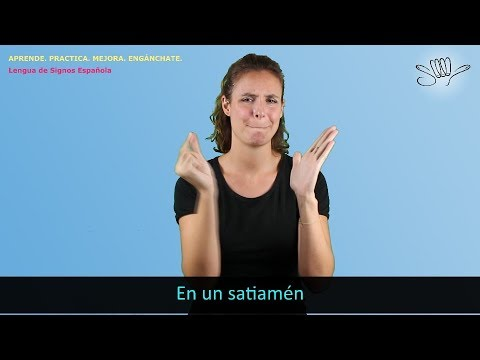

In [2]:
YOUTUBE_ID = 'vCU0NYkiyaI'


YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, remove the first 15 seconds and do the pose detection on the next 5 seconds:

In [ ]:
# Install the required packages
!apt-get install -y build-essential cmake git pkg-config
!apt-get install -y libatlas-base-dev libhdf5-dev libhdf5-serial-dev
!apt-get install -y libopencv-dev python3-opencv
!apt-get install -y python3-pip
!pip install numpy
!pip install ffmpeg-python

# Clone the OpenPose repository
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
%cd openpose

# Install the necessary OpenPose dependencies
!bash ./scripts/ubuntu/install_deps.sh

# Build OpenPose
!mkdir build
%cd build
!cmake ..
!make -j`nproc`

# Download OpenPose models
!wget https://github.com/CMU-Perceptual-Computing-Lab/openpose/models/2d/pose/coco/pose_iter_440000.caffemodel
!wget https://github.com/CMU-Perceptual-Computing-Lab/openpose/models/2d/pose/coco/pose_deploy_linevec.prototxt

# Set the YouTube video ID
YOUTUBE_ID = "vCU0NYkiyaI"

# Step 1: Download the YouTube video using yt-dlp
print("Downloading video...")
!pip install -U yt-dlp
!yt-dlp -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v={YOUTUBE_ID}

# Step 2: Cut the seconds between 15 and 20
print("Cutting video...")
!ffmpeg -y -loglevel info -i youtube.mp4 -ss 00:00:15.0 -t 5 video.mp4

# Step 3: Check if video.mp4 exists before running OpenPose
if os.path.isfile("video.mp4"):
    print("video.mp4 exists. Proceeding with OpenPose.")

    # Step 4: Run OpenPose to detect poses on the 5-second clip
    print("Running OpenPose...")
    openpose_command = "./openpose.bin --video ../video.mp4 --write_json ./output/ --display 0 --write_video ../openpose.avi --face --hand"

    # Run OpenPose and log the output
    result = subprocess.run(openpose_command, shell=True, text=True)

    # Check if openpose.avi was created
    if os.path.isfile("openpose.avi"):
        print("openpose.avi generated successfully. Converting to output.mp4.")

        # Step 5: Convert the OpenPose output to MP4
        !ffmpeg -y -loglevel info -i openpose.avi output.mp4

        # Check if output.mp4 exists
        if os.path.isfile("output.mp4"):
            print("output.mp4 created successfully.")
        else:
            print("Failed to create output.mp4. Please check the FFmpeg conversion step.")
    else:
        print("OpenPose did not generate openpose.avi. Please check for errors in the OpenPose execution.")
else:
    print("video.mp4 does not exist. Please check if the YouTube video was downloaded and cut successfully.")


In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('output.mp4', width=960, height=720)